# Отчет по лабораторной работе 1
## Ледовской Михаил, Железнов Артем, Щипков Матвей
## Группа А-02-22
### Пункт 1

В среде GoogleColab создали новый блокнот(notebook).Импортировали необходимые для работы библиотеки и модули.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

### Пункт 2
Загрузили набор данных MNIST, содержащий размеченные изображения рукописных цифр.

In [6]:
from keras.datasets import mnist

### Пункт 3
Разбили набор данных на обучающие и тестовые данные в соотношении 60000:10000 элементов. При разбиении параметр random_state выбрали 11.
Вывели размерности полученных обучающих и тестовых массивов данных.

In [7]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
from sklearn.model_selection import train_test_split
#объединяем в один набор
X=np.concatenate((X_train,X_test))
y=np.concatenate((y_train,y_test))
#разбиваем по вариантам
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10000,train_size=60000,random_state=20)
#вывод размерностей
print('Shape of X train:',X_train.shape)
print('Shape of y train:',y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


### Пункт 4
Вывели первые 4 элемента обучающих данных

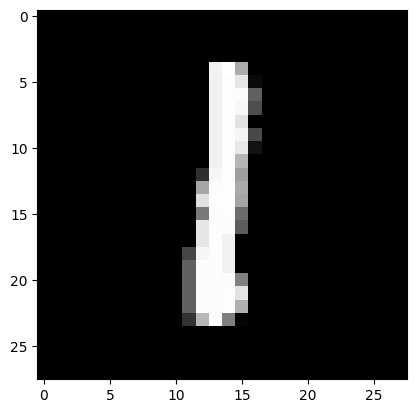

1


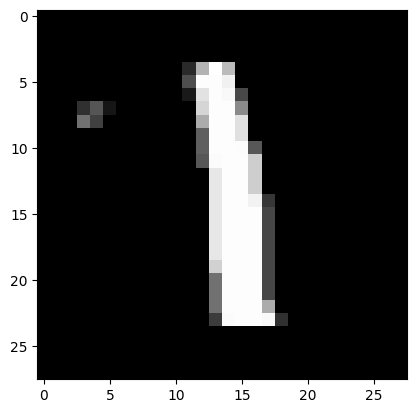

1


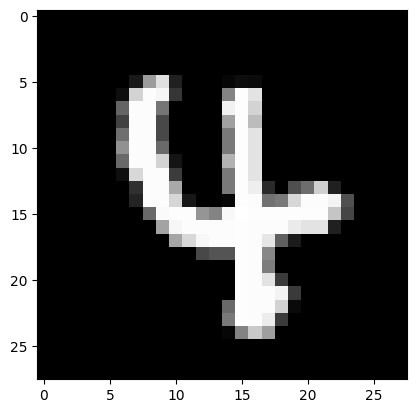

4


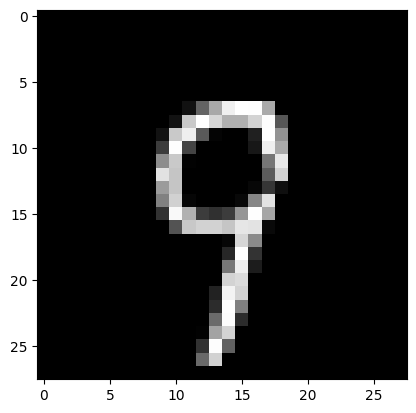

9


In [8]:
#вывод изображения
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[1])

plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[2])

plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[3])

plt.imshow(X_train[4],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[4])


### Пункт 5
Провели предобработку данных: привели обучающие и тестовые данные к формату, пригодному для обучения нейронной сети.
Входные данные должны  принимать  значения  от  0  до  1, метки  цифрдолжны  быть закодированы  по  принципу  «one-hotencoding».Вывели  размерности предобработанных обучающих и тестовых массивов данных.

In [9]:
#развернем каждое изображение 28*28 в вектор 784
num_pixels=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixels) / 255
X_test=X_test.reshape(X_test.shape[0],num_pixels) / 255
print('Shape of transformed X train:',X_train.shape)


Shape of transformed X train: (60000, 784)


In [10]:
#переведем метки в one-hot
import keras.utils
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)
print('Shape of transformed y train:',y_train.shape)
num_classes=y_train.shape[1]


Shape of transformed y train: (60000, 10)


### Пункт 6
Реализовали  модель однослойной нейронной  сети  и  обучили  ее  на обучающих данных с выделением части обучающих данных в качестве валидационных. Вывели  информацию  об архитектуре нейронной  сети. Вывели график функции ошибки на обучающих и валидационных данных по эпохам.

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model_1 = Sequential()
model_1.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
print(model_1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Обучаем модель
H = model_1.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6997 - loss: 1.1841 - val_accuracy: 0.8700 - val_loss: 0.5217
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8749 - loss: 0.4929 - val_accuracy: 0.8850 - val_loss: 0.4360
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8909 - loss: 0.4140 - val_accuracy: 0.8893 - val_loss: 0.4007
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8952 - loss: 0.3887 - val_accuracy: 0.8932 - val_loss: 0.3809
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9001 - loss: 0.3671 - val_accuracy: 0.8973 - val_loss: 0.3675
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9057 - loss: 0.3505 - val_accuracy: 0.9012 - val_loss: 0.3575
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9059 - loss: 0.3443 - val_accuracy: 0.9007 - val_loss: 0.3528
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9101 - loss: 0.3316 - 

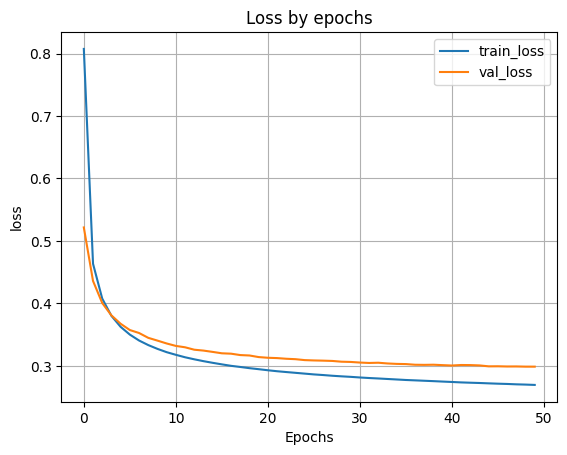

In [14]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

### Пункт 7
Применили обученную модель к тестовым данным. Вывели значение функции ошибки и значение метрики качества классификации на тестовых данных.

In [15]:
# Оценка качества работы модели на тестовых данных
scores = model_1.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9199 - loss: 0.2956
Loss on test data: 0.2802773714065552
Accuracy on test data: 0.9199000000953674


### Пункт 8
Добавили в модель один скрытый и провели обучение и тестирование при 100, 300, 500 нейронах в скрытом слое. По метрике качества классификации на тестовых данных выбрали наилучшее количество нейронов в скрытом слое. 

При 100 нейронах

In [16]:
# создаем модель
model_1h100 = Sequential()
model_1h100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# Обучаем модель
H_1h100 = model_1h100.fit(X_train, y_train, validation_split=0.1, epochs=50)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5186 - loss: 1.8903 - val_accuracy: 0.8175 - val_loss: 0.9782
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8339 - loss: 0.8547 - val_accuracy: 0.8592 - val_loss: 0.6317
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8692 - loss: 0.5860 - val_accuracy: 0.8738 - val_loss: 0.5115
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8823 - loss: 0.4847 - val_accuracy: 0.8818 - val_loss: 0.4504
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8907 - loss: 0.4308 - val_accuracy: 0.8892 - val_loss: 0.4150
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8948 - loss: 0.3960 - val_accuracy: 0.8913 - val_loss: 0.3912
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8978 - loss: 0.3748 - val_accuracy: 0.8945 - val_loss: 0.3739
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9010 - loss: 0.3571 - 

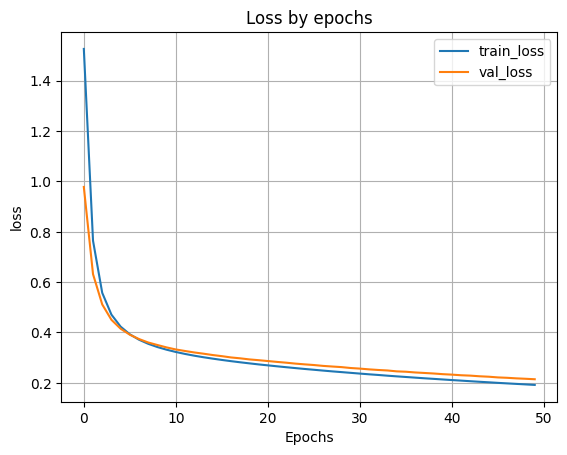

In [18]:
# вывод графика ошибки по эпохам
plt.plot(H_1h100.history['loss'])
plt.plot(H_1h100.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [19]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9421 - loss: 0.2016
Loss on test data: 0.1981867104768753
Accuracy on test data: 0.9398000240325928


При 300 нейронах

In [20]:
# создаем модель
model_1h300 = Sequential()
model_1h300.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
model_1h300.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h300.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# Обучаем модель
H_1h300 = model_1h300.fit(X_train, y_train, validation_split=0.1, epochs=50)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5636 - loss: 1.7772 - val_accuracy: 0.8303 - val_loss: 0.8547
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8468 - loss: 0.7468 - val_accuracy: 0.8572 - val_loss: 0.5789
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8721 - loss: 0.5363 - val_accuracy: 0.8743 - val_loss: 0.4822
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8854 - loss: 0.4512 - val_accuracy: 0.8823 - val_loss: 0.4301
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8898 - loss: 0.4107 - val_accuracy: 0.8900 - val_loss: 0.4021
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8963 - loss: 0.3807 - val_accuracy: 0.8920 - val_loss: 0.3837
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8991 - loss: 0.3648 - val_accuracy: 0.8938 - val_loss: 0.3716
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8989 - loss: 0.3554 - 

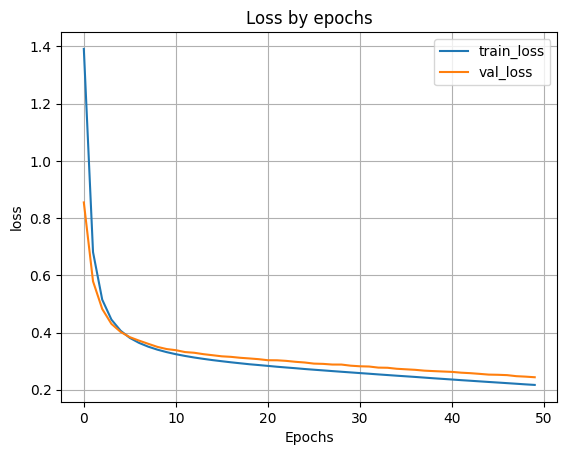

In [22]:
# вывод графика ошибки по эпохам
plt.plot(H_1h300.history['loss'])
plt.plot(H_1h300.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [23]:
# Оценка качества работы модели на тестовых данных
scores = model_1h300.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9318 - loss: 0.2330
Loss on test data: 0.22451213002204895
Accuracy on test data: 0.9320999979972839


При 500 нейронах

In [24]:
# создаем модель
model_1h500 = Sequential()
model_1h500.add(Dense(units=500, input_dim=num_pixels, activation='sigmoid'))
model_1h500.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h500.summary())


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
# Обучаем модель
H_1h500 = model_1h500.fit(X_train, y_train, validation_split=0.1, epochs=50)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5548 - loss: 1.7694 - val_accuracy: 0.8335 - val_loss: 0.8194
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8446 - loss: 0.7199 - val_accuracy: 0.8643 - val_loss: 0.5553
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8702 - loss: 0.5211 - val_accuracy: 0.8750 - val_loss: 0.4687
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8846 - loss: 0.4429 - val_accuracy: 0.8832 - val_loss: 0.4242
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8914 - loss: 0.4015 - val_accuracy: 0.8865 - val_loss: 0.3980
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8965 - loss: 0.3772 - val_accuracy: 0.8915 - val_loss: 0.3807
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8985 - loss: 0.3711 - val_accuracy: 0.8932 - val_loss: 0.3685
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9011 - loss: 0.3468 - 

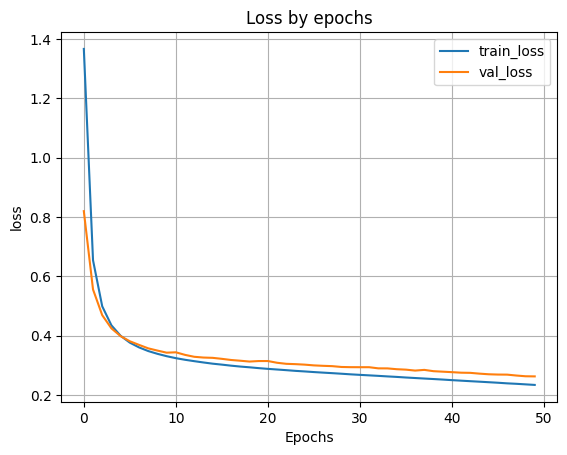

In [26]:
# вывод графика ошибки по эпохам
plt.plot(H_1h500.history['loss'])
plt.plot(H_1h500.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [27]:
# Оценка качества работы модели на тестовых данных
scores = model_1h500.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.2530
Loss on test data: 0.24226699769496918
Accuracy on test data: 0.9291999936103821


Наилучшую метрику наблюдаем при архитектуре со 100 нейронами в скрытом слое.

### Пункт 9
Добавили в наилучшую архитектуру, определенную в п. 8, второй скрытый слой и провели обучение и тестирование при 50 и 100 нейронах во втором скрытом слое.

При 50 нейронах

In [28]:
# создаем модель
model_1h100_2h50 = Sequential()
model_1h100_2h50.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100_2h50.add(Dense(units=50, activation='sigmoid'))
model_1h100_2h50.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h100_2h50.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100_2h50.summary())


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

None


In [29]:
# Обучаем модель
H_1h100_2h50 = model_1h100_2h50.fit(X_train, y_train, validation_split=0.1, epochs=50)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2284 - loss: 2.2754 - val_accuracy: 0.5273 - val_loss: 2.0668
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6059 - loss: 1.9391 - val_accuracy: 0.6995 - val_loss: 1.4788
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7227 - loss: 1.3435 - val_accuracy: 0.7643 - val_loss: 1.0211
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7838 - loss: 0.9510 - val_accuracy: 0.8127 - val_loss: 0.7872
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8210 - loss: 0.7388 - val_accuracy: 0.8405 - val_loss: 0.6501
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8455 - loss: 0.6185 - val_accuracy: 0.8610 - val_loss: 0.5603
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8620 - loss: 0.5408 - val_accuracy: 0.8712 - val_loss: 0.5009
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8731 - loss: 0.4861 - 

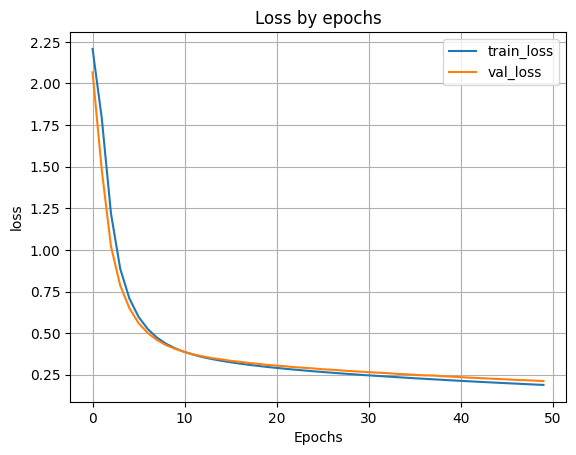

In [30]:
# вывод графика ошибки по эпохам
plt.plot(H_1h100_2h50.history['loss'])
plt.plot(H_1h100_2h50.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [31]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100_2h50.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9413 - loss: 0.2001
Loss on test data: 0.19637857377529144
Accuracy on test data: 0.9409000277519226


При 100 нейронах

In [32]:
# создаем модель
model_1h100_2h100 = Sequential()
model_1h100_2h100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100_2h100.add(Dense(units=100, activation='sigmoid'))
model_1h100_2h100.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h100_2h100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100_2h100.summary())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
# Обучаем модель
H_1h100_2h100 = model_1h100_2h100.fit(X_train, y_train, validation_split=0.1, epochs=50)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1944 - loss: 2.2929 - val_accuracy: 0.6115 - val_loss: 2.1164
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5457 - loss: 2.0001 - val_accuracy: 0.6318 - val_loss: 1.5437
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6726 - loss: 1.3931 - val_accuracy: 0.7293 - val_loss: 1.0558
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7587 - loss: 0.9758 - val_accuracy: 0.7947 - val_loss: 0.7999
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8090 - loss: 0.7507 - val_accuracy: 0.8320 - val_loss: 0.6535
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8389 - loss: 0.6182 - val_accuracy: 0.8545 - val_loss: 0.5586
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8608 - loss: 0.5351 - val_accuracy: 0.8667 - val_loss: 0.4988
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8739 - loss: 0.4841 - 

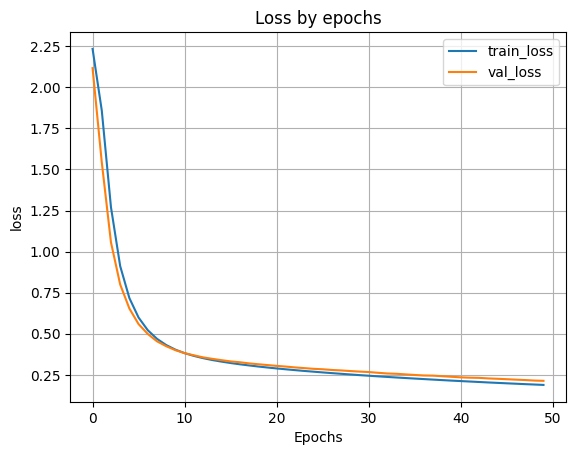

In [34]:
# вывод графика ошибки по эпохам
plt.plot(H_1h100_2h100.history['loss'])
plt.plot(H_1h100_2h100.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [35]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100_2h100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9426 - loss: 0.2008
Loss on test data: 0.19593027234077454
Accuracy on test data: 0.9416999816894531


### Пункт 10
Результаты исследования архитектуры нейронной сети занесли в таблицу

### Таблица с результатами тестирования нейросетевых моделей

| Количество скрытых слоёв | Количество нейронов в первом скрытом слое | Количество нейронов во втором скрытом слое | Значение метрики качества классификации |
|---------------------------|-------------------------------------------|--------------------------------------------|-----------------------------------------|
| 0                         | -                                         | -                                          |  0.9199000000953674                     |
| 1                         | 100                                       | -                                          |  0.9398000240325928                     |
|                           | 300                                       | -                                          |  0.9320999979972839                    |
|                           | 500                                       | -                                          |  0.9291999936103821                    |
| 2                         | 100                        | 50                                         |  0.9409000277519226                     |
|                           | 100                        | 100                                        |  0.9416999816894531                    |

Исходя из нашего исследования, можно сделать вывод о том, что наилучшая архитектра - это архитектура с двумя скрытыми слоями (100 нейронов на первом скрытом слое и 100 на втором).

### Пункт 11
Сохранили  наилучшую  нейронную  сеть  на  диск


In [36]:
model_1h100_2h100.save('best_model.keras')

### Пункт 12
Вывели результаты тестирования модели

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
NN output: [[9.9311924e-01 5.2934556e-08 3.6617029e-03 1.9478831e-04 1.4328006e-05
  2.6737533e-03 2.4743416e-04 3.6820653e-05 2.7412230e-05 2.4572681e-05]]


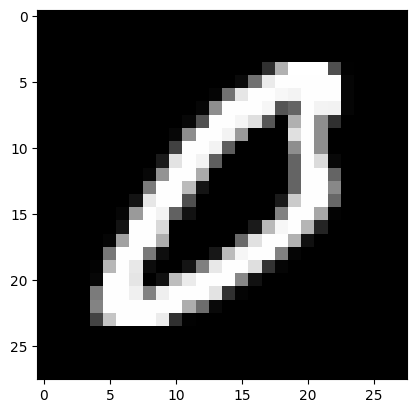

Real mark:  0
NN answer:  0


In [ ]:
# вывод тестового изображения и результата распознавания 1
n = 123
result = model_1h100_2h100.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


### Пункт 13
Создали собственные изображения чисел

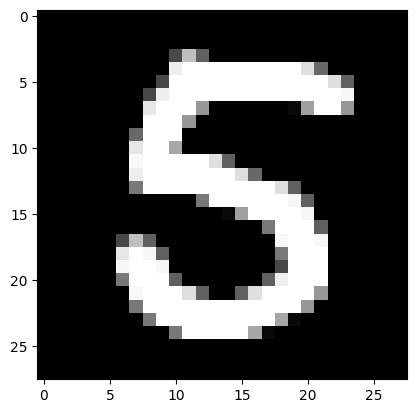

In [ ]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('five_v3.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()


In [ ]:
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model_1h100_2h100.predict(test_img)
print('I think it\'s ', np.argmax(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
I think it's  5


### Пункт 14
Создали копию нарисованных чисел и повернем их на 90 градусов. Протестируем работу нейронной сети.

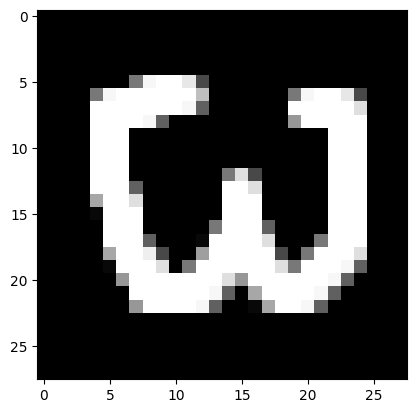

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
I think it's  2


In [ ]:
file_data = Image.open('three_v3_rotated.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model_1h100_2h100.predict(test_img)
print('I think it\'s ', np.argmax(result))


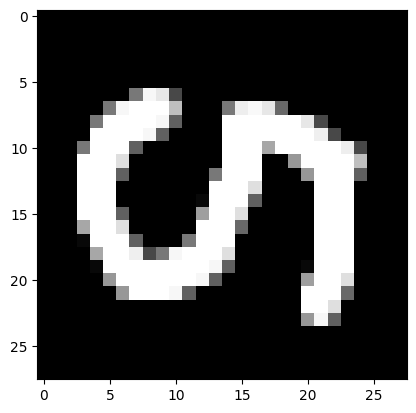

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
I think it's  2


In [ ]:
file_data = Image.open('five_v3_rotated.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model_1h100_2h100.predict(test_img)
print('I think it\'s ', np.argmax(result))


Нейросеть некорректно определила повернутые изображения.